# Example 14: Protein Sequence Classification

In this example, we will see how to use KAN in protein sequence classification. We will be using one hot encoding to encode the amino acids.

#### This is just an example how it can be used for protein sequences. Need to use real data to actually observe the performance.

In [1]:
from kan import *
import torch
import random
import numpy as np

In [2]:
# Hyperparameters
PROTEIN_WINDOW_SIZE = 5 

# define the universe of possible input amino acids, ie. vocab list
aa_list = 'ARNDCQEGHILKMFPSTWYVX'

In [3]:
def one_hot_encode(protein_sequence):
    """
    One-hot encodes a protein sequence.

    Args:
        protein_sequence (str): The input protein sequence.

    Returns:
        numpy.array: The one-hot encoded representation of the protein sequence.
    """
    # Create a dictionary mapping amino acids to indices
    aa_to_index = {aa: i for i, aa in enumerate(aa_list)}
    
    # Initialize an array of zeros with shape (sequence_length, alphabet_length)
    encoding = np.zeros((len(protein_sequence), len(aa_list)))
    
    # Iterate over the protein sequence and set the corresponding index to 1
    for i, aa in enumerate(protein_sequence):
        if aa in aa_to_index:
            encoding[i, aa_to_index[aa]] = 1
        else:
            # If the amino acid is not in the alphabet, set the last index to 1 (unknown)
            encoding[i, -1] = 1
    
    return encoding

In [5]:
def generate_sample_protein_dataset(num_samples=20, protein_window_size=5):
    """
    Generate a dataset of protein sequences of length 11, keeping Lysine(K) in the center for label 1 and Serine(S) for label 0. 

    Args:
        num_samples (int): Number of samples to generate.
        protein_window_size (int): Length of the protein sequence.

    Returns:
        dict: A dictionary containing train_input, test_input, train_label, and test_label.
    """
    
    dataset = {'train_input': [], 'test_input': [], 'train_label': [], 'test_label': []}
    alphabet = 'ARNDCQEGHILKMFPSTWYVX'

    # Generate half of the samples with label 1 and half with label 0
    label_sequence = [1] * (num_samples // 2) + [0] * (num_samples // 2)
    random.shuffle(label_sequence)

    for label in label_sequence:
        # Generate a protein sequence with 'K' in the middle for label 1 and 'S' for label 0
        if label == 1:
            center_aa = 'K'
        else:
            center_aa = 'S'
        sequence = ''.join(random.choices(alphabet.replace(center_aa, ''), k=protein_window_size//2)) + center_aa + ''.join(random.choices(alphabet.replace(center_aa, ''), k=protein_window_size//2))
        print(sequence, label)
        encoded_sequence = one_hot_encode(sequence).flatten()

        # Split the dataset into train and test (50% each)
        if len(dataset['train_input']) < num_samples // 2:
            dataset['train_input'].append(encoded_sequence)
            dataset['train_label'].append(label)
        else:
            dataset['test_input'].append(encoded_sequence)
            dataset['test_label'].append(label)

    # Convert lists to tensors
    dataset['train_input'] = torch.tensor(dataset['train_input'])
    dataset['test_input'] = torch.tensor(dataset['test_input'])
    dataset['train_label'] = torch.tensor(dataset['train_label']).view(-1, 1)
    dataset['test_label'] = torch.tensor(dataset['test_label']).view(-1, 1)

    return dataset

# Generate dataset with 10 samples
dataset = generate_sample_protein_dataset(40)

GTKYX 1
TTKPP 1
AESVY 0
MYSFD 0
SQKNT 1
IDKAC 1
AXKTA 1
TESDW 0
YXSTF 0
VTSYF 0
HYKYE 1
RDSPA 0
MDSNK 0
SCKFH 1
AHKED 1
EFKYA 1
EPKLR 1
GWSRE 0
GMSYE 0
IPSKD 0
NSKQA 1
TWKNL 1
TCKFF 1
HNKSG 1
QNSKR 0
RVKYC 1
TESCP 0
SMKXE 1
IYSEV 0
XQSKD 0
VKSYN 0
EESGV 0
IISMQ 0
FLKGE 1
VMKGH 1
PTKMH 1
TLSIQ 0
TTSMA 0
ATKEE 1
MGSFT 0


In [6]:
print(dataset)

{'train_input': tensor([[0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 1., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64), 'test_input': tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64), 'train_label': tensor([[1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0]]), 'test_label': tensor([[1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0

In [9]:
# define model
# create a KAN: 105 inputs, 2D output, and 3 hidden neurons. k=2, 3 grid intervals (grid=3).
# considering window size: 5, 5 times 21(vocab size), input-> 21 * 5

model = KAN(width=[105,3,2], grid=3, k=2)

In [10]:
def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).float())

def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float())

results = model.train(dataset, opt="LBFGS", steps=5, metrics=(train_acc, test_acc));
results['train_acc'][-1], results['test_acc'][-1]

train loss: 1.04e-03 | test loss: 2.33e-01 | reg: 6.38e+01 : 100%|████| 5/5 [00:15<00:00,  3.00s/it]


(1.0, 0.949999988079071)

In [11]:
lib = ['x','x^2']

model.auto_symbolic(lib=lib)

fixing (0,0,0) with x^2, r2=0.9999999665312771
fixing (0,0,1) with x^2, r2=0.9999979934036755
fixing (0,0,2) with x^2, r2=0.9999999622133074
fixing (0,1,0) with x^2, r2=0.9999999799949156
fixing (0,1,1) with x^2, r2=0.9991883825579457
fixing (0,1,2) with x^2, r2=0.9999994895376765
fixing (0,2,0) with x^2, r2=0.9999990593107048
fixing (0,2,1) with x^2, r2=0.9999996655563207
fixing (0,2,2) with x^2, r2=0.999999966951783
fixing (0,3,0) with x^2, r2=0.0
fixing (0,3,1) with x^2, r2=0.0
fixing (0,3,2) with x^2, r2=0.0
fixing (0,4,0) with x^2, r2=0.0
fixing (0,4,1) with x^2, r2=0.0
fixing (0,4,2) with x^2, r2=0.0
fixing (0,5,0) with x^2, r2=0.9999998808271742
fixing (0,5,1) with x^2, r2=0.9999998953621121
fixing (0,5,2) with x^2, r2=0.999999968375537
fixing (0,6,0) with x^2, r2=0.9981315108075913
fixing (0,6,1) with x^2, r2=0.999999843899342
fixing (0,6,2) with x^2, r2=0.9999999589830514
fixing (0,7,0) with x^2, r2=0.0
fixing (0,7,1) with x^2, r2=0.0
fixing (0,7,2) with x^2, r2=0.0
fixing (0,

In [12]:
formula1, formula2 = model.symbolic_formula()[0]
formula1

0.44*(0.02*(-x_1 - 1)**2 + 0.02*(x_10 + 1)**2 + 0.04*(-x_101 - 1)**2 + 0.01*(-x_13 - 1)**2 - 0.02*(-x_14 - 1)**2 - 0.02*(-x_15 - 1)**2 + 0.02*(-x_17 - 1)**2 + 0.03*(x_2 + 1)**2 - 0.e-2*(x_20 + 1)**2 - 0.e-2*(x_21 + 1)**2 - 0.03*(-x_24 - 1)**2 + 0.01*(-x_26 - 1)**2 - 0.02*(-x_29 - 1)**2 - 0.02*(-x_31 - 1)**2 + 0.01*(x_32 + 1)**2 + 0.01*(-x_33 - 1)**2 - 0.e-2*(x_37 + 1)**2 - 0.01*(-x_39 - 1)**2 - 0.e-2*(-x_40 - 1)**2 - 0.02*(-x_54 - 1)**2 + 0.02*(-x_58 - 1)**2 - 0.01*(-x_6 - 1)**2 - 0.01*(-x_66 - 1)**2 - 0.02*(-x_68 - 1)**2 + 0.02*(-x_69 - 1)**2 - 0.04*(x_70 + 1)**2 + 0.01*(-x_71 - 1)**2 + 0.03*(-x_73 - 1)**2 + 0.01*(-x_75 - 1)**2 + 0.01*(-x_76 - 1)**2 + 0.02*(-x_77 - 1)**2 - 0.01*(-x_82 - 1)**2 - 0.e-2*(-x_85 - 1)**2 - 0.02*(x_87 + 1)**2 - 0.e-2*(x_9 + 1)**2 - 0.04*(x_90 + 1)**2 + 0.03*(-x_91 - 1)**2 + 0.02*(x_93 + 1)**2 + 0.03*(x_98 + 1)**2 - 0.01*(-x_99 - 1)**2 - 1)**2 + 0.7*(-0.03*(-x_1 - 1)**2 - 0.02*(x_10 + 1)**2 + 0.02*(x_101 + 1)**2 - 0.03*(x_104 + 1)**2 + 0.05*(-x_13 - 1)**2 + 0

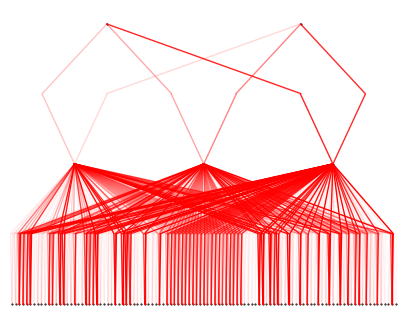

In [13]:
model.plot()